In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['Target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.Target.value_counts()

0    50
1    50
2    50
Name: Target, dtype: int64

In [8]:
#Independent and dependent features
X = df.iloc[:,:-1]
y = df.Target

In [9]:
from sklearn.model_selection import train_test_split as tts

In [10]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
classifier = DecisionTreeClassifier(criterion='entropy')

In [13]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [14]:
X_train.shape

(100, 4)

[Text(0.4444444444444444, 0.9285714285714286, 'x[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7857142857142857, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.7857142857142857, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.6428571428571429, 'x[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.5, 'x[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(0.2222222222222222, 0.21428571428571427, 'x[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.1111111111111111, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.3333333333333333, 0.07142857142

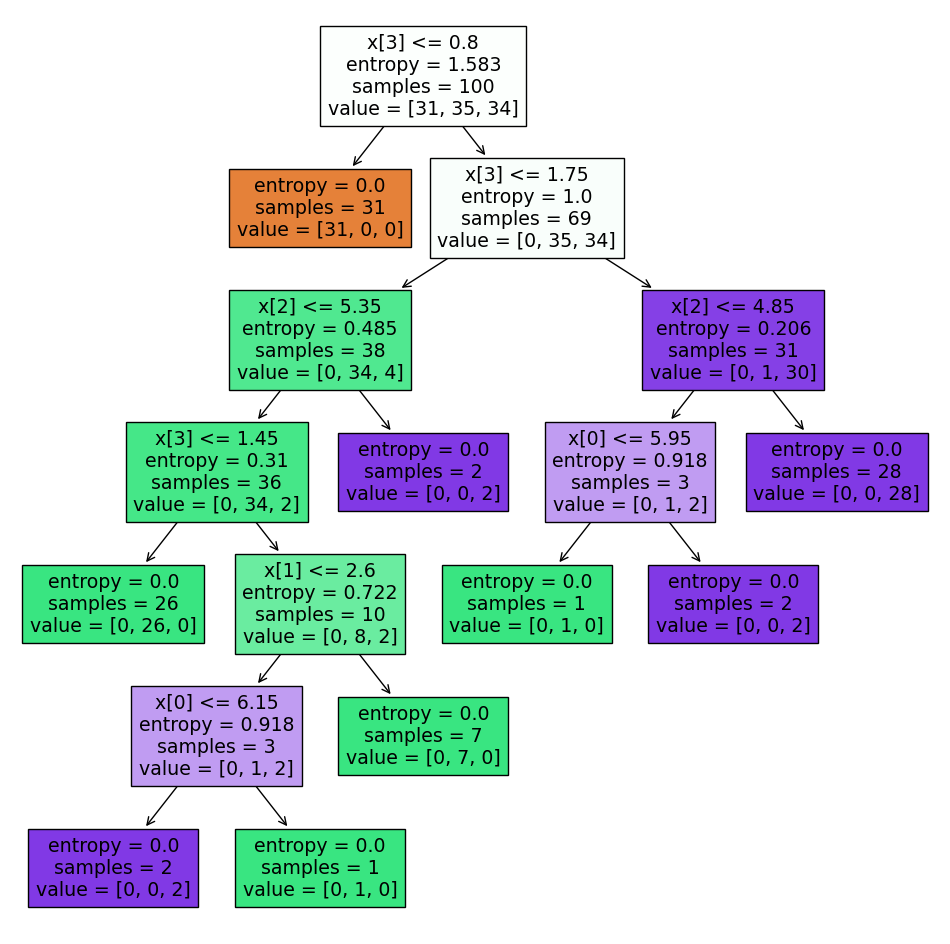

In [15]:
from sklearn import tree
plt.figure(figsize=(12, 12))
tree.plot_tree(classifier, filled=True)

### Post Pruning

In [16]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]')]

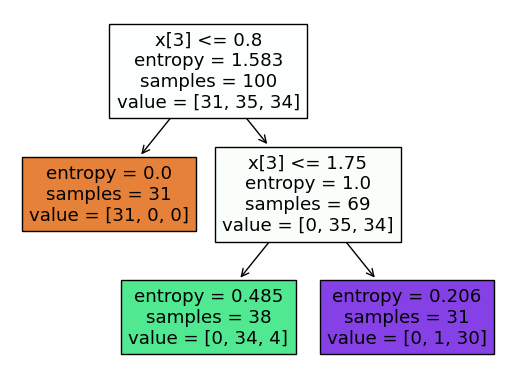

In [17]:
tree.plot_tree(classifier, filled=True)

### Prediction

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [20]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

0.98


### Pre Pruning with Hyperparameter Tuning

In [21]:
parameter = {
    'criterion':('gini', 'entropy', 'log_loss'),
    'splitter':('best', 'random'),
    'max_depth':[1,2,3,4,5],
    'max_features':('auto', 'sqrt', 'log2')
}

In [22]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [23]:
classifier = DecisionTreeClassifier()

In [24]:
clf = GridSearchCV(classifier, param_grid=parameter, cv=5, scoring='accuracy')

In [25]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'splitter': ('best', 'random')},
             scoring='accuracy')

In [26]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'splitter': 'best'}

In [27]:
y_pred = clf.predict(X_test)

In [28]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

0.98


In [29]:
weather = pd.read_csv('Weather.csv')
X = weather.iloc[:,1:-1]
y = weather.Play
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X, y)
tree.plot_tree(dt, filled=True)

ValueError: could not convert string to float: 'Sunny'